## Advent of Code 2021 - Day 13

### Star 1 & 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data: Nx2 array of dots and list of folds
dots = []
folds = []
with open('input_13_a.txt') as f:
    for line in f:
        if len(line) > 1:
            x, y = line.strip().split(',')
            dot = (int(x), int(y))
            dots.append(dot)
        else:
            break
    for line in f:
        instruction = line.strip().split(' ')[2]
        axis, dist = instruction.split('=')
        fold = (axis, int(dist))
        folds.append(fold)
dots = np.array(dots)

In [3]:
# update each dot location based on distance from the fold
for fold in folds:
    if fold[0] == 'x':
        crease = np.array([1, 0])
    else:
        crease = np.array([0, 1])
    crease *= fold[1]
    dots = np.abs(crease - np.abs(dots - crease))
    # break  # uncomment to only execute FIRST fold

In [4]:
# plot the dots onto a piece of paper, duplicates naturally over-written
paper = np.zeros(np.max(dots, axis=0)+1)
paper[dots[:, 0], dots[:, 1]] = 1

print(f'Number of dots = {paper.sum()}')

Number of dots = 93.0


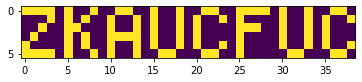

In [5]:
plt.imshow(paper.T)  # transpose to flip x/y